Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/05/08


In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from scipy import stats, integrate
from sklearn.feature_selection import VarianceThreshold
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from scipy.stats import boxcox
from sklearn import preprocessing

%matplotlib inline

sb.set_style('darkgrid')
my_dpi = 96

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Software Bug Prediction through metrics 


## Question:

Can the Chidamber & Kemerer software metrics be used to accurately predict the number of bugs in software? 


### Data:

Data comes from the Tera-PROMOSE repository for Software Engineering research website [4].
The website houses a section of CK metrics for a number software projects. For each of the 33 projects there is one or more CSV files containing CK software metrics computed for each class definition within the project.   All metrics hosted at the website where harvested from projects programed in the Java programming language.

The Data used for this study was a smaller subset of the 33. Fourteen projects where used. These 14 where comprised of both academic and professional software projects. Most coming the Apache Software Foundation. The metric data was concatenated from 14 CSV files into a single CSV file for easier manipulation.  

The 14 projects are;
1. Arc
2. Ant
3. Berek
4. Camel
5. Ckjm
6. Ivy
7. JEdit
8. Lucene
9. log4j
10. Nieruchomosci
11. Tomcat
12. Velocity
13. Xalan
14. Xerces

The above data can [be found at](http://openscience.us/repo/defect/ck/).  The metric data was hosted by Italian researchers interested in using the project metrics to perform clustering in order  to  identify  groups  of  software  projects  with  similar  characteristic  from  the  defect  prediction  point  of  view [5].



### Context:

Computers are ubiquitous. In everything from house appliances to motor vehicles.  The software run on these computers has become extremely complex and large tasked with controlling driverless cars to flying multiple drones simultaneously. With this increased software complexity comes higher rates of software bugs.  Many bugs do not get identified and corrected before the software is released. The cost of correcting a software bug increases as the defect passes through the later phases of the Software Development life cycle [6]. 

Machine learning can help identify which pieces of software have higher rates of defects thus allowing teams to focus their testing resources on those portions of the software. Therefore, reducing costs. In addition, defect prediction  can be used address short comings in design that can be used to address later projects. 


### Content:

The Chidamber and Kemerer (C&K) Metrics were designed to assess the quality of Object Oriented programming languages [2].  The metrics were first proposed in 1994 when the only commercially significant Object-Oriented languages were Smalltalk and C++. Chidamber and Kemerer used a two commercial applications (one in C++ and one in Smalltalk) to assess the validity of their metrics.

Although measuring the amount of reuse a code base contains is frequently mentioned this was not the initial aim of of the metrics. They had read Grady Booch's 'Object Oriented Design with Applications' and were looking for a set of metrics that would assist this design approach. The idea was that the metrics would allow a designer to compare one potential design against another and predict which would be better. This meant that the metrics would have to be capable of being based on a design rather than code. Another interesting point was that C&K firmly believed in a practical commercial approach stating '0bject Oriented design metrics should offer needed insights into whether developers are following 00 principles in their designs.



 + Weighted Methods per Class - The value of the WMC is equal  to  the  number  of  methods  in  the  class  (assuming  unity weights for all methods).


+ Depth of Inheritance Tree - The number of class definitions from the top of the class hierarchy to the leaf.


+ Number of Children - The number of immediate descendants of the class under question.


+ Coupling between classes - Represents the number of classes coupled to a given class (efferent  couplings  and  afferent  couplings). These  couplings  can  occur  through  method  calls, field  accesses,  inheritance,  method  arguments, return types, and exceptions.


+ Response for a Class - Measures the number of different methods that can be executed when an instance of that class has an interface method invoked. Transitive closure of the method call graph.


+ Lack of Cohesion in Methods - Counts the sets of methods in a class that are not related through the sharing of some of the class attributes. Attempts to measure of how well the methods of the class co-operate to achieve the aims of the class.


+ Lack of Cohesion 3 (LCOM3) - Metric  proposed by Henderson-Sellars. LCOM3 is calculated by (numMethods -numAccesses/numInstVars)/(numMethods-1) where numMethods is the number of methods in the class, numAccesses is the number of methods in a class that access an instance variable and numInstvars is the number of instance variables.


+ Number of Public Methods - The methods in a class that are declared as public. The metric is known also as Class Interface Size (CIS).


+ Inheritance Coupling - The number of parent classes to which a given class is coupled.


+ Measure of Functional Abstraction - The ratio of the number of methods inherited by a class to the total number of methods accessible by the member methods of the class.


+ Average Method Complexity - This metric measures the average method size for each class.


+ Afferent couplings - The number of classes that depend upon the measured class. 


+ Efferent couplings - The number of classes that the measured class is depended upon.


+ Lines of Code - The number of lines of code in the Java binary code of the class under investigation.


+ Data Access Metric - The ratio of the number of private (protected) attributes to the total number of attributes declared in the class.


+  Cohesion Among Methods of Class - The relatedness among methods of a class based upon the parameter list of the methods. The metric is computed using the summation of number of different types of method  parameters in every method divided by a multiplication of number of different method parameter types in whole class and number of methods. 


+ Coupling Between Methods - Measures the total number of new/redefined methods to which all the inherited methods are coupled. There is a coupling when at least one of the conditions given in the IC metric is held.


+ Max Cyclomatic complexity - The max complexity of all methods comprising a class. It is a quantitative measure of the number of linearly independent paths through a program's source code.


+ Average Cyclomatic complexity - The average complexity of all methods comprising a class. It is a quantitative measure of the number of linearly independent paths through a program's source code.


+ Measure of Aggregation - The extent of the part-whole relationship, realized by using attributes. The metric is a count of the number of class fields whose types are user defined classes.


+ Number of Bugs - Programmatically gleamed from source code repository logs. According to the log content decides whether a commit is a bugfix. A commit is interpreted as a bugfix when it solves an issue reported in the bug tracking system.


In [2]:
# Read CSV containing software metrics data
data_file = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/std_and_trans_metrics.csv'
metrics = pd.read_csv(data_file)
print("\nObservations : %d\nFeatures : %d" % (metrics.shape[0], metrics.shape[1]))

# Remove the name.1 feature. This is the name of the source code file that the metrics pertain to.
del metrics['name.1']


Observations : 5727
Features : 21


## Preprocessing and exploratory data analysis

The software metrics dataset has been read from a CSV that has already had a far amount of exploratory data analysis and preprocessing carried out.  The notebook housing these steps can be found [here](https://github.com/315iah515/Thinkful-Notebooks/blob/master/Bootcamp/Supervised/CapStone/SupervisedCapstoneExploratory.ipynb).

This has been done for brevity.  All features have been standardized except for for the target variable.  Standardization of the features offers a number of advantages.  First, all metrics now have the same scale and can be easily compared.  Secondly, decision trees and random forests are one of the very few machine learning algorithms that do not require feature scaling and due to the nature of the question we hope to answer it is likely that some form of Regression model will be employed.

Fifteen of the features are discrete in nature while the remaining 6 are continuous. 
Most features have a exponential distribution with positive outliers.  Some features have a geometric distribution.  These descriptions apply to the original state of the data before transformation. Please see the link above for more detail. 

None of the features have a normal distribution. Eleven of the features have been transformed using the BoxCox transformation. 

$$y^i=\frac{\lambda^y - 1}{\lambda}$$

Due to the large number of zero values for metrics a positive constant was added to a metric value before the transformation was invoked.
One feature was transformed using a root transformation, specifically taking the square root of the metric value.
For more details see the link to the other notebook for details. Six of the features' distributions have a right skewness and were altered using a cube root transformation. 


## Feature Selection

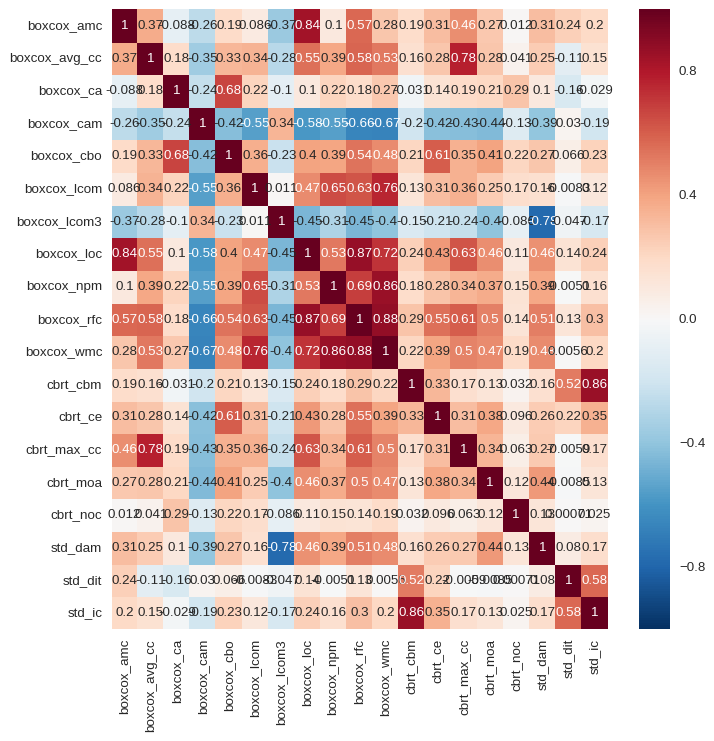

In [3]:
exclude = ['cube_root_bugs']
corr = metrics.ix[:, metrics.columns.difference(exclude)].corr()
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__  = sb.heatmap(corr, annot=True)

There is quite a bit of multicollinearity between the features. Average and Max Cyclomatic complexity (CC) are correlated.   High cyclomatic complexity is a sign of poorly developed code and increases the likelihood of introducing defects once said code must be re-factored and makes the code harder to test.  The code becomes harder to manage.  Average  Cyclomatic complexity will be dropped in favor of Max CC. We are interested in predicting bugs per observation which is a single source code file.  The higher the CC is for a file the greater the probability of that file containing any type of defect.

Inheritance Coupling (IC) and Coupling Between Methods are highly correlated. For IC to be present a class must be derived from another class and have one of its inherited methods be functionally dependent on the new or redefined methods in the class.  This sounds like unnecessary coupling between parent and child (i.e., code smell).  While Coupling between methods (CBM) appears to be a special category of IC.  CBM will be dropped in favor of IC.

Another set of correlated features are Number of Public Methods and Weighted Method Count(WMC). WMC is just the total number of methods contained within a class definition.  All methods have the same weight of 1, so it is unclear why the metric has this name.  Seeing that number of public methods is a subset of WMC it will be dropped in favor of WMC.  Doubtless that WMC is attempting to measure the amount of effort and/or time needed to develop and maintain the class.

## Conclusions

## References

1. http://openscience.us/repo/index.html
2. Chidamber, S.R.; Kemerer, C.F. IEEE Transactions on Software Engineering Volume 20, Issue 6, Jun 1994 Page(s):476 - 493
3. http://openscience.us/repo/defect/ck/
4. Menzies, T., Krishna, R., Pryor, D. (2016). The Promise Repository of Empirical Software Engineering Data; http://openscience.us/repo. North Carolina State University, Department of Computer Science
5. http://madeyski.e-informatyka.pl/download/JureczkoMadeyski10f.pdf
6. Cigital, "Case study: Finding defects earlier yields enormous savings," Available at www.cigital.com, 2003

